#Model Interpretability
The following tasks are to be completed in the assignement:

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3. Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods

#Abstract
**What is the dataset about ?**

The main goal is to predict cost on media campaigns in food mart of USA, this data is used to understand the Customer Acquisition Cost

We analyze the SHAP analysis, by following 3 methods





In [ ]:
 #Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=d528392508370669fc0e586000c3b498574e608720405a20a8d94b23d2d44a8a
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Sriram-Northeastern/DataScience/main/cost.csv")

In [ ]:
pd.set_option('display.max_columns', None)

This command helps in viewing all columns, thereby understanding the need to display which columns and accordingly remove them.

In [ ]:
df.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                      4.0           Bag Stuffers   
1                   2.5944                      3.0  Cash Register Lottery   
2                   1.3616                      2.0    High Roller Savings   
3                   1.1776                      2.0  Cash Register Lottery   
4                   1.4280                      3.0       Double Down Sale   

  sales_country marital_status gender  total_children            education  \
0           USA              M      F             1.0  Partial High School   
1           USA              M      M             0.0     Bachelors Degree   
2           USA              S      F             4.0  Partial High School   
3           USA              M      F             2.0   High School Degree   
4           USA              M      M             0.0  Partial High School   

  member_card      occupation houseowner  avg_cars_at home(approx)  \
0      Normal  Skilled Manual          Y                       1.0   
1      Silver    Professional          Y                       4.0   
2      Normal          Manual          N                       1.0   
3      Bronze          Manual          Y                       2.0   
4      Bronze  Skilled Manual          N                       2.0   

  avg. yearly_income  num_children_at_home  avg_cars_at home(approx).1  \
0        $10K - $30K                   1.0                         1.0   
1        $50K - $70K                   0.0                         4.0   
2        $10K - $30K                   0.0                         1.0   
3        $30K - $50K                   2.0                         2.0   
4        $30K - $50K                   0.0                         2.0   

   brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  \
0  Carrington  1.84         19.70       17.70                 1.0      0.0   
1  Carrington  1.84         19.70       17.70                 1.0      0.0   
2  Carrington  1.84         19.70       17.70                 1.0      0.0   
3  Carrington  1.84         19.70       17.70                 1.0      0.0   
4      Golden  1.36          7.12        5.11                 0.0      1.0   

   units_per_case          store_type store_city store_state  store_sqft  \
0            17.0  Deluxe Supermarket      Salem          OR     27694.0   
1            17.0  Deluxe Supermarket      Salem          OR     27694.0   
2            17.0  Deluxe Supermarket      Salem          OR     27694.0   
3            17.0  Deluxe Supermarket      Salem          OR     27694.0   
4            29.0  Deluxe Supermarket      Salem          OR     27694.0   

   grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  \
0       18670.0       5415.0     3610.0         1.0          1.0        1.0   
1       18670.0       5415.0     3610.0         1.0          1.0        1.0   
2       18670.0       5415.0     3610.0         1.0          1.0        1.0   
3       18670.0       5415.0     3610.0         1.0          1.0        1.0   
4       18670.0       5415.0     3610.0         1.0          1.0        1.0   

   prepared_food  florist          media_type    cost  
0            1.0      1.0  Daily Paper, Radio  126.62  
1            1.0      1.0  Daily Paper, Radio   59.86  
2            1.0      1.0  Daily Paper, Radio   84.16  
3            1.0      1.0     In-Store Coupon   95.78  
4            1.0      1.0               Radio   50.79

In [ ]:
df1 = df.drop(['food_category','food_department','food_family','promotion_name','avg. yearly_income','brand_name','store_type','store_city','store_state','media_type','education','member_card','occupation','sales_country'],axis=1)

Dropping unnecessary columns

In [ ]:
df1

store_sales(in millions)  store_cost(in millions)  \
0                          7.36                   2.7232   
1                          5.52                   2.5944   
2                          3.68                   1.3616   
3                          3.68                   1.1776   
4                          4.08                   1.4280   
...                         ...                      ...   
60423                      2.76                   1.3248   
60424                      1.60                   0.4960   
60425                      5.52                   2.5392   
60426                      8.28                   2.5668   
60427                      9.20                   4.2320   

       unit_sales(in millions) marital_status gender  total_children  \
0                          4.0              M      F             1.0   
1                          3.0              M      M             0.0   
2                          2.0              S      F             4.0   
3                          2.0              M      F             2.0   
4                          3.0              M      M             0.0   
...                        ...            ...    ...             ...   
60423                      1.0              M      F             1.0   
60424                      1.0              S      F             2.0   
60425                      2.0              M      M             1.0   
60426                      3.0              S      M             2.0   
60427                      4.0              S      F             3.0   

      houseowner  avg_cars_at home(approx)  num_children_at_home  \
0              Y                       1.0                   1.0   
1              Y                       4.0                   0.0   
2              N                       1.0                   0.0   
3              Y                       2.0                   2.0   
4              N                       2.0                   0.0   
...          ...                       ...                   ...   
60423          Y                       1.0                   1.0   
60424          N                       2.0                   0.0   
60425          Y                       3.0                   0.0   
60426          N                       4.0                   0.0   
60427          Y                       1.0                   0.0   

       avg_cars_at home(approx).1   SRP  gross_weight  net_weight  \
0                             1.0  1.84         19.70       17.70   
1                             4.0  1.84         19.70       17.70   
2                             1.0  1.84         19.70       17.70   
3                             2.0  1.84         19.70       17.70   
4                             2.0  1.36          7.12        5.11   
...                           ...   ...           ...         ...   
60423                         1.0  2.76         19.60       18.60   
60424                         2.0  1.60         17.40       15.30   
60425                         3.0  2.76         19.60       18.60   
60426                         4.0  2.76         19.60       18.60   
60427                         1.0  2.30         21.50       19.50   

       recyclable_package  low_fat  units_per_case  store_sqft  grocery_sqft  \
0                     1.0      0.0            17.0     27694.0       18670.0   
1                     1.0      0.0            17.0     27694.0       18670.0   
2                     1.0      0.0            17.0     27694.0       18670.0   
3                     1.0      0.0            17.0     27694.0       18670.0   
4                     0.0      1.0            29.0     27694.0       18670.0   
...                   ...      ...             ...         ...           ...   
60423                 1.0      0.0            26.0     22478.0       15321.0   
60424                 1.0      0.0            36.0     22478.0       15321.0   
60425                 1.0      0.0            26.0     

In [ ]:
df1.describe()

store_sales(in millions)  store_cost(in millions)  \
count              60428.000000             60428.000000   
mean                   6.541031                 2.619460   
std                    3.463047                 1.453009   
min                    0.510000                 0.163200   
25%                    3.810000                 1.500000   
50%                    5.940000                 2.385600   
75%                    8.670000                 3.484025   
max                   22.920000                 9.726500   

       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
count             60428.000000    60428.000000              60428.000000   
mean                  3.093169        2.533875                  2.200271   
std                   0.827677        1.490165                  1.109644   
min                   1.000000        0.000000                  0.000000   
25%                   3.000000        1.000000                  1.000000   
50%                   3.000000        3.000000                  2.000000   
75%                   4.000000        4.000000                  3.000000   
max                   6.000000        5.000000                  4.000000   

       num_children_at_home  avg_cars_at home(approx).1           SRP  \
count          60428.000000                60428.000000  60428.000000   
mean               0.829351                    2.200271      2.115258   
std                1.303424                    1.109644      0.932829   
min                0.000000                    0.000000      0.500000   
25%                0.000000                    1.000000      1.410000   
50%                0.000000                    2.000000      2.130000   
75%                1.000000                    3.000000      2.790000   
max                5.000000                    4.000000      3.980000   

       gross_weight    net_weight  recyclable_package       low_fat  \
count  60428.000000  60428.000000        60428.000000  60428.000000   
mean      13.806433     11.796289            0.558665      0.350434   
std        4.622693      4.682986            0.496551      0.477110   
min        6.000000      3.050000            0.000000      0.000000   
25%        9.700000      7.710000            0.000000      0.000000   
50%       13.600000     11.600000            1.000000      0.000000   
75%       17.700000     16.000000            1.000000      1.000000   
max       21.900000     20.800000            1.000000      1.000000   

       units_per_case    store_sqft  grocery_sqft   frozen_sqft     meat_sqft  \
count    60428.000000  60428.000000  60428.000000  60428.000000  60428.000000   
mean        18.860694  27988.477494  19133.799696   5312.852552   3541.846280   
std         10.258555   5701.022090   3987.395735   1575.907263   1050.471635   
min          1.000000  20319.000000  13305.000000   2452.000000   1635.000000   
25%         10.000000  23593.000000  16232.000000   4746.000000   3164.000000   
50%         19.000000  27694.000000  18670.000000   5062.000000   3375.000000   
75%         28.000000  30797.000000  22123.000000   5751.000000   3834.000000   
max         36.000000  39696.000000  30351.000000   9184.000000   6122.000000   

         coffee_bar   video_store     salad_bar  prepared_food       florist  \
count  60428.000000  60428.000000  60428.000000   60428.000000  60428.000000   
mean       0.612646      0.354157      0.587956       0.587956      0.562603   
std        0.487150      0.478261      0.492207       0.492207      0.496069   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000      0.000000       0.000000      0.000000   
50%        1.000000      0.000000      1.000000       1.000000      1.000000   
75%        1.000000      1.000000      1.000000       1.000000      1.000000   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

               cost  
count  604

In [ ]:
df1.head()

store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  \
0                      7.36                   2.7232                      4.0   
1                      5.52                   2.5944                      3.0   
2                      3.68                   1.3616                      2.0   
3                      3.68                   1.1776                      2.0   
4                      4.08                   1.4280                      3.0   

  marital_status gender  total_children houseowner  avg_cars_at home(approx)  \
0              M      F             1.0          Y                       1.0   
1              M      M             0.0          Y                       4.0   
2              S      F             4.0          N                       1.0   
3              M      F             2.0          Y                       2.0   
4              M      M             0.0          N                       2.0   

   num_children_at_home  avg_cars_at home(approx).1   SRP  gross_weight  \
0                   1.0                         1.0  1.84         19.70   
1                   0.0                         4.0  1.84         19.70   
2                   0.0                         1.0  1.84         19.70   
3                   2.0                         2.0  1.84         19.70   
4                   0.0                         2.0  1.36          7.12   

   net_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
0       17.70                 1.0      0.0            17.0     27694.0   
1       17.70                 1.0      0.0            17.0     27694.0   
2       17.70                 1.0      0.0            17.0     27694.0   
3       17.70                 1.0      0.0            17.0     27694.0   
4        5.11                 0.0      1.0            29.0     27694.0   

   grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  \
0       18670.0       5415.0     3610.0         1.0          1.0        1.0   
1       18670.0       5415.0     3610.0         1.0          1.0        1.0   
2       18670.0       5415.0     3610.0         1.0          1.0        1.0   
3       18670.0       5415.0     3610.0         1.0          1.0        1.0   
4       18670.0       5415.0     3610.0         1.0          1.0        1.0   

   prepared_food  florist    cost  
0            1.0      1.0  126.62  
1            1.0      1.0   59.86  
2            1.0      1.0   84.16  
3            1.0      1.0   95.78  
4            1.0      1.0   50.79

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
df.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [ ]:
target = df1["cost"]

In [ ]:
df1.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'marital_status', 'gender', 'total_children',
       'houseowner', 'avg_cars_at home(approx)', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'SRP', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist', 'cost'],
      dtype='object')

In [ ]:
features = df1[['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children'
       , 'avg_cars_at home(approx)', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'SRP', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist']]

In [ ]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

Concatenating two pandas dataframes, "features" and "target", along axis 1 (i.e., horizontally), where "features" contains the input variables/features for a machine learning model, and "target" contains the corresponding output variable(s)/target(s).

In [ ]:
datasetClean.shape

(60428, 23)

In [ ]:
datasetClean.isna().sum()

store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
total_children                0
avg_cars_at home(approx)      0
num_children_at_home          0
avg_cars_at home(approx).1    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
grocery_sqft                  0
frozen_sqft                   0
meat_sqft                     0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [ ]:
target.shape

(60428,)

In [ ]:
features.shape

(60428, 22)

In [ ]:
df1 = df1.reset_index()

In [ ]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

This line of code replaces all occurrences of positive and negative infinity in DataFrame df1 with NaN.

In this case, the first argument is a list containing np.inf and -np.inf, which represent positive and negative infinity, respectively. The second argument is np.nan, which is a special floating-point value used to represent missing or undefined data in Pandas. Finally, the inplace flag is set to True, which means that the modifications will be made to the original DataFrame df1, rather than returning a new modified DataFrame.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

We are splitting the dataset, where the test dataset is 33% and the testing dataset is 67%.

In [ ]:
X_train.head()

store_sales(in millions)  store_cost(in millions)  \
38054                      9.52                   3.3320   
14765                      2.84                   1.3064   
51915                      5.55                   2.7195   
58282                      5.26                   2.3670   
3113                       8.76                   4.0296   

       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
38054                      4.0             5.0                       3.0   
14765                      4.0             4.0                       2.0   
51915                      3.0             0.0                       2.0   
58282                      2.0             4.0                       2.0   
3113                       4.0             4.0                       2.0   

       num_children_at_home  avg_cars_at home(approx).1   SRP  gross_weight  \
38054                   0.0                         3.0  2.38          14.7   
14765                   0.0                         2.0  0.71          20.6   
51915                   0.0                         2.0  1.85          16.4   
58282                   0.0                         2.0  2.63          13.6   
3113                    1.0                         2.0  2.19          14.5   

       net_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
38054        11.6                 0.0      0.0             4.0     36509.0   
14765        18.6                 1.0      0.0            21.0     36509.0   
51915        14.3                 1.0      0.0            19.0     23598.0   
58282        11.6                 1.0      0.0            12.0     23112.0   
3113         12.5                 0.0      1.0            23.0     21215.0   

       grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  \
38054       22450.0       8435.0     5624.0         0.0          0.0   
14765       22450.0       8435.0     5624.0         0.0          0.0   
51915       14210.0       5633.0     3755.0         0.0          0.0   
58282       16418.0       4016.0     2678.0         1.0          1.0   
3113        13305.0       4746.0     3164.0         1.0          0.0   

       salad_bar  prepared_food  florist  
38054        0.0            0.0      0.0  
14765        0.0            0.0      0.0  
51915        0.0            0.0      1.0  
58282        1.0            1.0      1.0  
3113         0.0            0.0      0.0

In [ ]:
y_train.shape

(40486,)

#1. Fit a linear model and interpret the regression coefficients
Linear Model

In [ ]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()

In [ ]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cost   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          2.060e+04
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:15:06   Log-Likelihood:                     -1.9650e+05
No. Observations:               40486   AIC:                                  3.930e+05
Df Residuals:                   40466   BIC:                                  3.932e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
store_sales(in millions)      -6.9641      0.208    -33.541      0.000      -7.371      -6.557
store_cost(in millions)       -0.1772      0.357     -0.497      0.619      -0.876       0.522
unit_sales(in millions)       17.8319      0.321     55.532      0.000      17.202      18.461
total_children                 0.2519      0.114      2.211      0.027       0.029       0.475
avg_cars_at home(approx)       0.7704      0.069     11.087      0.000       0.634       0.907
num_children_at_home          -0.2431      0.130     -1.874      0.061      -0.497       0.011
avg_cars_at home(approx).1     0.7704      0.069     11.087      0.000       0.634       0.907
SRP                           23.2951      0.470     49.570      0.000      22.374      24.216
gross_weight                   3.4503      0.217     15.909      0.000       3.025       3.875
net_weight                    -3.0070      0.216    -13.934      0.000      -3.430      -2.584
recyclable_package             1.1979      0.311      3.857      0.000       0.589       1.807
low_fat                        1.3810      0.323      4.275      0.000       0.748       2.014
units_per_case                 0.1124      0.015      7.551      0.000       0.083       0.142
store_sqft                     0.9851      0.360      2.733      0.006       0.279       1.691
grocery_sqft                  -0.9840      0.360     -2.730      0.006      -1.690      -0.278
frozen_sqft                   -2.0893      0.476     -4.393      0.000      -3.021      -1.157
meat_sqft                      0.6719      0.569      1.180      0.238      -0.444       1.788
coffee_bar                     6.4305      0.449     14.317      0.000       5.550       7.311
video_store                   -3.5675      0.496     -7.188      0.000      -4.540      -2.595
salad_bar                     -4.8428      0.276    -17.553      0.000      -5.384      -4.302
prepared_food                 -4.8428      0.276    -17.553      0.000      -5.384      -4.302
florist                        1.5868      0.491      3.234      0.001       0.625       2.548
==============================================================================
Omnibus:                    16052.280   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2030.363
Skew:                           0.043   Prob(JB):                         0.00
Kurtosis:                       1.906   Cond. No.                     1.20e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that 

#Interpreting Regression Co-efficients

## Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

As seen in the co-efficient coloumn in the above table

Value for the variable SRP is highest = 23.2951
Followed by unit sales = 17.8319
High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above SRP and unit sales seems to be the most important variables to predict target i.e. customer acquisition cost.

Also, it signifies that Higher the value of SRP and unit_sales - better is the sales.

##P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

unit_sales
store_sales
avg_cars_at_home
num_children_at_home

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (cost).

##Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

##Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.995 which could be interpreted as a positive auto-correlation in the residuals of regression.

##Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 2030.363 which again re-inforces the interpretation we got from Skew and Kurtosis.

In [ ]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [ ]:
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score



#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 26.562471
RMSE: 30.943715
R2 -0.061413


Interpretation of model coefficients:

Prob(F- Statistic) = 0.00 indicates that our model is satatistically significant an all significace levels.

R squared value of 0.06 indicate that 6% of the data is explained/fit by the model.
lr_pred
P > |t| has a value less than 0.1 for logitude, latitude, neighbourhood group, neighbourhood, room type, no of reviews, availabilty 365 indicating that these variables are important in predicting the price.

#2. Fit a tree-based model and interpret the nodes
Tree based Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.04506428886288283


DTree.score tells us how well the decision tree classifier is able to classify the samples in the test set correctly, as a percentage of the total number of samples.

Here the DTree_score 0.0450, means that the decision tree classifier correctly classified 4.5% of the samples in the test set.

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.04506428886288283


In [ ]:
prediction_tree = DTree.predict(X_test)


In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 25.282727
RMSE: 29.350618
R2 0.045064


MAE (Mean Absolute Error): It measures the average absolute difference between the predicted and actual values. It is expressed in the same units as the target variable and represents the average magnitude of the errors in the predictions. A lower MAE indicates a better fit of the model to the data.In our case the **MAE rate is 25.2827** which is high

RMSE (Root Mean Squared Error): It is similar to MAE, but it takes the square root of the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily than smaller ones and is also expressed in the same units as the target variable. A lower RMSE also indicates a better fit of the model to the data. **Here the RMSE rate is 29.350** which showcases how the differences are set aside.

R2 score (Coefficient of determination): It measures the proportion of variance in the target variable that can be explained by the predictor variables in the model. It ranges from 0 to 1, with a higher value indicating a better fit of the model to the data. An R2 score of 1 means that the model perfectly predicts the target variable, while a score of 0 means that the model provides no improvement over the mean value of the target variable. In our case we got the R2 score at 0.045

[Text(0.5, 0.875, 'video_store <= 0.5\nsquared_error = 899.944\nsamples = 40486\nvalue = 99.29'),
 Text(0.25, 0.625, 'frozen_sqft <= 4871.0\nsquared_error = 903.532\nsamples = 26245\nvalue = 101.714'),
 Text(0.125, 0.375, 'grocery_sqft <= 28907.0\nsquared_error = 908.529\nsamples = 11429\nvalue = 104.208'),
 Text(0.0625, 0.125, 'squared_error = 911.555\nsamples = 10849\nvalue = 103.671'),
 Text(0.1875, 0.125, 'squared_error = 745.716\nsamples = 580\nvalue = 114.249'),
 Text(0.375, 0.375, 'meat_sqft <= 3328.5\nsquared_error = 891.178\nsamples = 14816\nvalue = 99.79'),
 Text(0.3125, 0.125, 'squared_error = 646.09\nsamples = 2959\nvalue = 94.856'),
 Text(0.4375, 0.125, 'squared_error = 944.749\nsamples = 11857\nvalue = 101.022'),
 Text(0.75, 0.625, 'meat_sqft <= 3534.0\nsquared_error = 862.535\nsamples = 14241\nvalue = 94.822'),
 Text(0.625, 0.375, 'total_children <= 0.5\nsquared_error = 872.555\nsamples = 7620\nvalue = 101.673'),
 Text(0.5625, 0.125, 'squared_error = 749.719\nsamples = 7

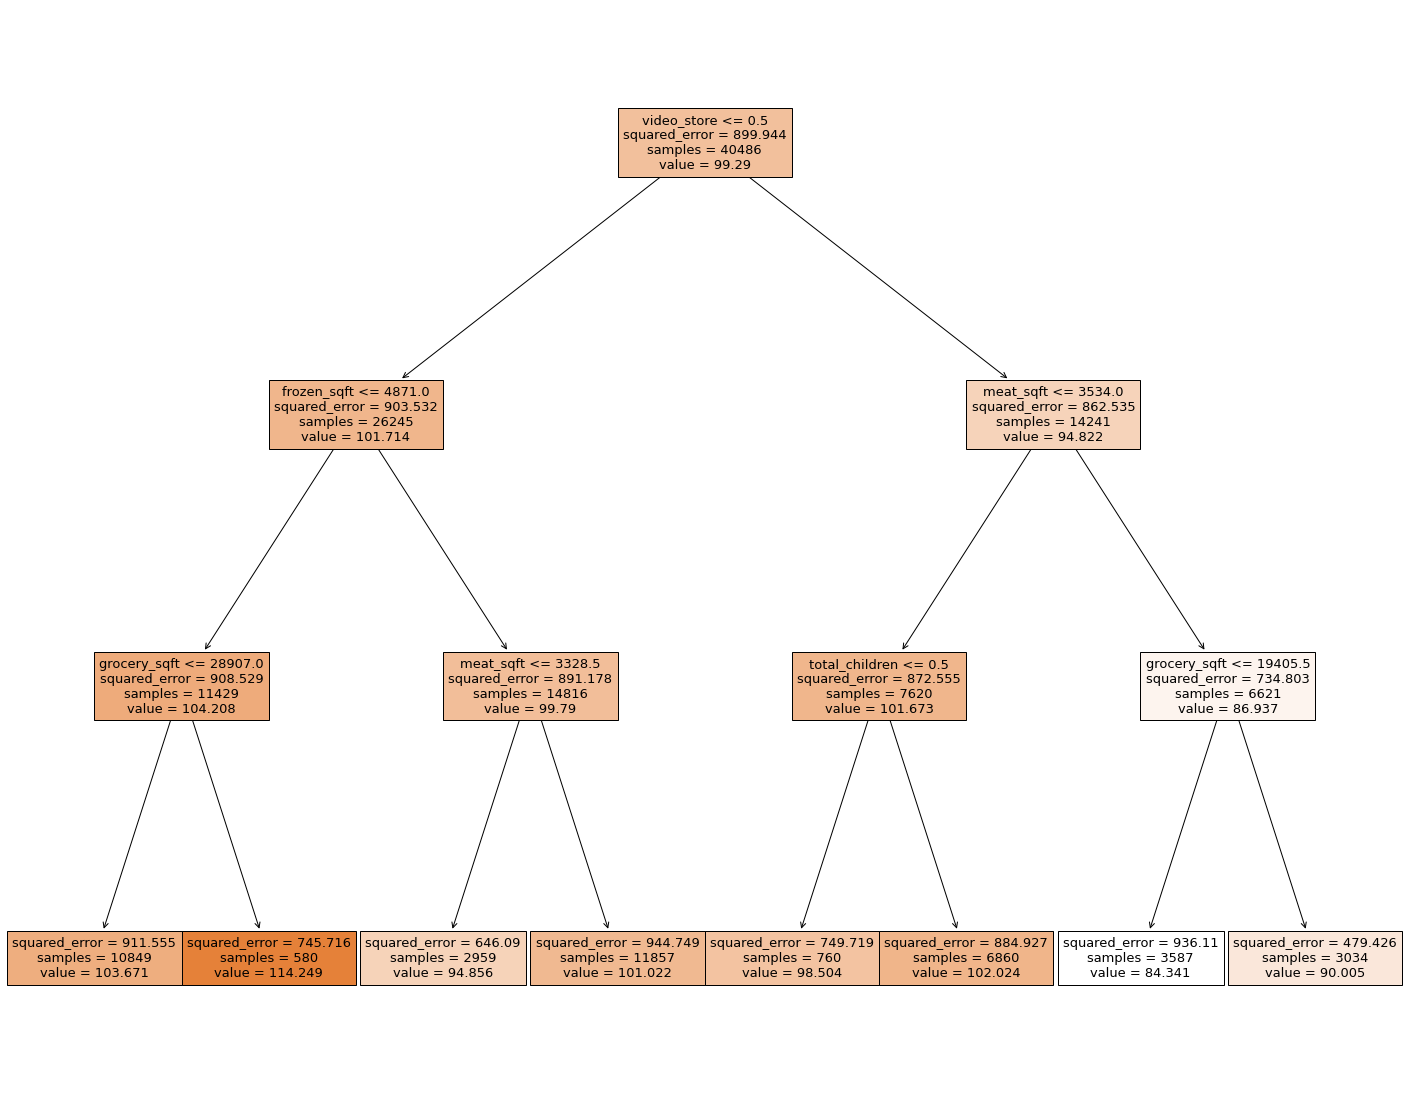

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

Using the plot_tree function from the tree module of the sklearn library to visualize a decision tree model, represented by the DTree object.

#3. Use auto ml to find the best model
AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8qigiw_0
  JVM stdout: /tmp/tmp8qigiw_0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8qigiw_0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_s0zpb6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [ ]:
datasetClean.isna().sum()

store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
total_children                0
avg_cars_at home(approx)      0
num_children_at_home          0
avg_cars_at home(approx).1    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
grocery_sqft                  0
frozen_sqft                   0
meat_sqft                     0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [ ]:
#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [ ]:
dataset_train.shape


(12086, 23)

In [ ]:
dataset_test = dataset_test.sample(frac=.5)

In [ ]:
dataset_train.isna().sum()


store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
total_children                0
avg_cars_at home(approx)      0
num_children_at_home          0
avg_cars_at home(approx).1    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
grocery_sqft                  0
frozen_sqft                   0
meat_sqft                     0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [ ]:
features_autoML = list(features.columns)
features_autoML


['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [ ]:
target_autoML = 'cost'

In [ ]:
dataset_train.head()


store_sales(in millions)  store_cost(in millions)  \
32194                      4.77                   1.5264   
53293                      1.34                   0.6298   
22722                      8.52                   2.9820   
39885                      3.96                   1.3464   
22699                      1.62                   0.5346   

       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
32194                      3.0             3.0                       2.0   
53293                      2.0             1.0                       1.0   
22722                      3.0             0.0                       1.0   
39885                      3.0             1.0                       2.0   
22699                      3.0             1.0                       1.0   

       num_children_at_home  avg_cars_at home(approx).1   SRP  gross_weight  \
32194                   3.0                         2.0  1.59         21.00   
53293                   1.0                         1.0  0.67          8.43   
22722                   0.0                         1.0  2.84         19.40   
39885                   1.0                         2.0  1.32         14.20   
22699                   0.0                         1.0  0.54          9.01   

       net_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
32194       19.00                 1.0      1.0             9.0     23598.0   
53293        7.43                 0.0      0.0             6.0     22478.0   
22722       17.30                 1.0      0.0             6.0     27694.0   
39885       12.10                 0.0      1.0            35.0     23688.0   
22699        7.01                 0.0      0.0             8.0     27694.0   

       grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  \
32194       14210.0       5633.0     3755.0         0.0          0.0   
53293       15321.0       4294.0     2863.0         1.0          0.0   
22722       18670.0       5415.0     3610.0         1.0          1.0   
39885       15337.0       5011.0     3340.0         1.0          1.0   
22699       18670.0       5415.0     3610.0         1.0          1.0   

       salad_bar  prepared_food  florist    cost  
32194        0.0            0.0      1.0   83.26  
53293        0.0            0.0      0.0  134.01  
22722        1.0            1.0      1.0  126.62  
39885        1.0            1.0      1.0  126.88  
22699        1.0            1.0      1.0   55.59

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
datasetAutoML.head()


store_sales(in millions)    store_cost(in millions)    unit_sales(in millions)    total_children    avg_cars_at home(approx)    num_children_at_home    avg_cars_at home(approx).1    SRP    gross_weight    net_weight    recyclable_package    low_fat    units_per_case    store_sqft    grocery_sqft    frozen_sqft    meat_sqft    coffee_bar    video_store    salad_bar    prepared_food    florist    cost
--------------------------  -------------------------  -------------------------  ----------------  --------------------------  ----------------------  ----------------------------  -----  --------------  ------------  --------------------  ---------  ----------------  ------------  --------------  -------------  -----------  ------------  -------------  -----------  ---------------  ---------  ------
                      4.77                     1.5264                          3                 3                           2                       3                             2   1.59           21            19                        1          1                 9         23598           14210           5633         3755             0              0            0                0          1   83.26
                      1.34                     0.6298                          2                 1                           1                       1                             1   0.67            8.43          7.43                     0          0                 6         22478           15321           4294         2863             1              0            0                0          0  134.01
                      8.52                     2.982                           3                 0                           1                       0                             1   2.84           19.4          17.3                      1          0                 6         27694           18670           5415         3610             1              1            1                1          1  126.62
                      3.96                     1.3464                          3                 1                           2                       1                             2   1.32           14.2          12.1                      0          1                35         23688           15337           5011         3340             1              1            1                1          1  126.88
                      1.62                     0.5346                          3                 1                           1                       0                             1   0.54            9.01          7.01                     0          0                 8         27694           18670           5415         3610             1              1            1                1          1   55.59
                      7.41                     2.5935                          3                 1                           4                       0                             4   2.47            8.87          6.86                     1          0                 5         21215           13305           4746         3164             1              0            0                0          0   66.78
                      1.38                     0.5106                          2                 3                           1                       0                             1   0.69           12.3          11.3                      0          0                17         22478           15321           4294         2863             1              0            0                0          0   69.42
                      2.85                     0.912                           3                 4                           3                       0                             3   0.95            8.29          7.28                     1          0                20         23688           15337           5011         3340             1              1  

In [ ]:
aml = H2OAutoML()
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)

#This model has a runtime of 58 mins

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_6_AutoML_2_20230325_195246


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       15/90
# GBM base models (used / total)           9/22
# XGBoost base models (used / total)       3/43
# DeepLearning base models (used / total)  3/22
# GLM base models (used / total)           0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 818.5211571294892
RMSE: 28.60980875730366
MAE: 24.625284440808073
RMSLE: 0.30669319689393154
Mean Residual Deviance: 818.5211571294892
R^2: 0.097135685064072
Null degrees of freedom: 10008
Residual degrees of freedom: 9993
Null deviance: 9074343.075149707
Residual deviance: 8192578.261709058
AIC: 95573.67150228421

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 857.7525928652399
RMSE: 29.287413557110842
MAE: 25.230590541676953
RMSLE: 0.31387193683975195
Mean Residual Deviance: 857.7525928652399
R^2: 0.054299666380189016
Null degrees of freedom: 12085
Residual degrees of freedom: 12064
Null deviance: 10962519.329095405
Residual deviance: 10366797.83736929
AIC: 115977.241830446

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     25.2275      0.27276     25.4555       24.8723       25.0571       25.2245       25.5281
mean_residual_deviance  857.626      15.2479     870.43        839.466       845.554       858.016       874.666
mse                     857.626      15.2479     870.43        839.466       845.554       858.016       874.666
null_deviance           2.1925e+06   61760.9     2.25659e+06   2.17913e+06   2.09983e+06   2.18608e+06   2.24089e+06
r2                      0.0542934    0.00648109  0.0453251     0.0623435     0.0520712     0.0584047     0.0533225
residual_deviance       2.07332e+06  64928.7     2.15431e+06   2.04326e+06   1.99043e+06   2.05752e+06   2.12107e+06
rmse                    29.2843      0.260403    29.503        28.9735       29.0784       29.2919       29.5748
rmsle                   0.313822     0.00367298  0.317419      0.309279      0.310606      0.315076      0.316731

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard


In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                    rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_6_AutoML_2_20230325_195246     29.2874  857.753  25.2306  0.313872                   857.753                6109                   0.130497  StackedEnsemble
GBM_grid_1_AutoML_2_20230325_195246_model_3              29.2888  857.831  25.2393  0.313986                   857.831                 460                   0.011344  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_15             29.2914  857.986  25.2518  0.314003                   857.986                 359                   0.009586  GBM
StackedEnsemble_BestOfFamily_7_AutoML_2_20230325_195246  29.2917  858.002  25.2274  0.313938                   858.002                1937                   0.132233  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20230325_195246  29.2918  858.011  25.2435  0.314018                   858.011                1356                   0.092534  StackedEnsemble
StackedEnsemble_Best1000_1_AutoML_2_20230325_195246      29.2926  858.059  25.2406  0.313986                   858.059                2250                   0.064231  StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_2_20230325_195246  29.2927  858.06   25.2432  0.314017                   858.06                  781                   0.085269  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20230325_195246     29.2953  858.213  25.2387  0.314006                   858.213                1594                   0.052517  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20230325_195246     29.2961  858.262  25.2426  0.314015                   858.262                1724                   0.040185  StackedEnsemble
GBM_grid_1_AutoML_2_20230325_195246_model_1              29.302   858.605  25.2432  0.314176                   858.605                 287                   0.005201  GBM
[111 rows x 9 columns]

In [ ]:
m = aml.get_best_model()


In [ ]:
print(m)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_6_AutoML_2_20230325_195246


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       15/90
# GBM base models (used / total)           9/22
# XGBoost base models (used / total)       3/43
# DeepLearning base models (used / total)  3/22
# GLM base models (used / total)           0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 818.5211571294892
RMSE: 28.60980875730366
MAE: 24.625284440808073
RMSLE: 0.30669319689

#4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Shap Analysis
SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2017)69 is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley values. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory.



In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np 
import math

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

# 1. Shap Analysis of the Linear Model


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


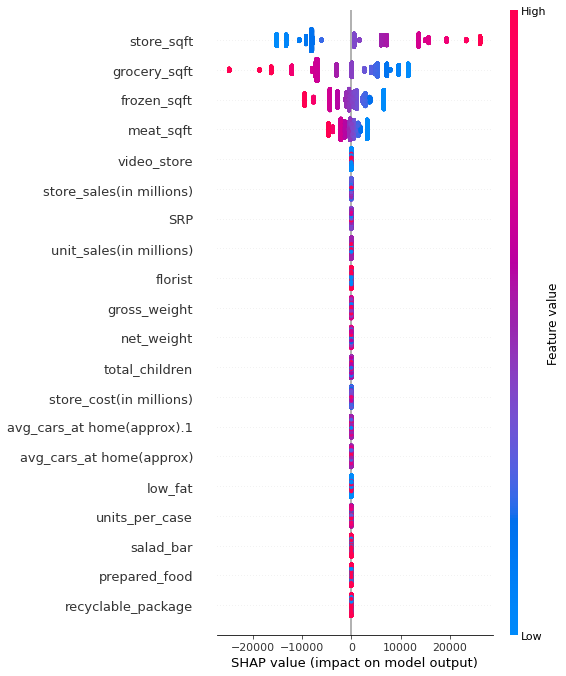

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

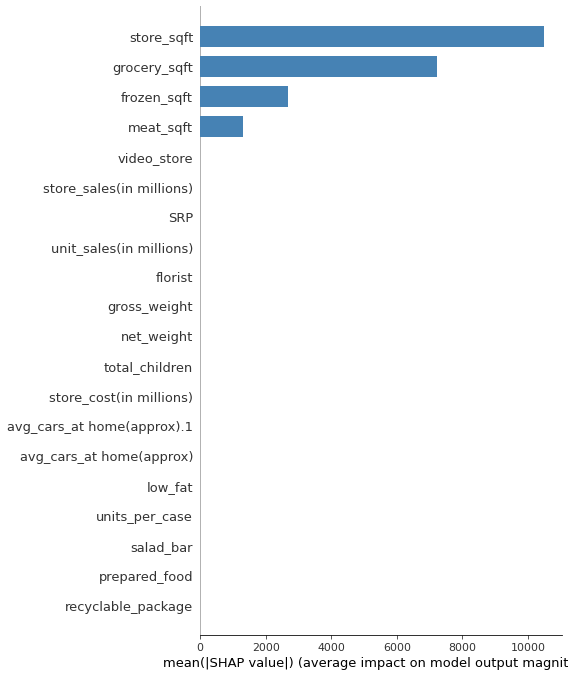

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

#2. Tree Model - Shap Analysis

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


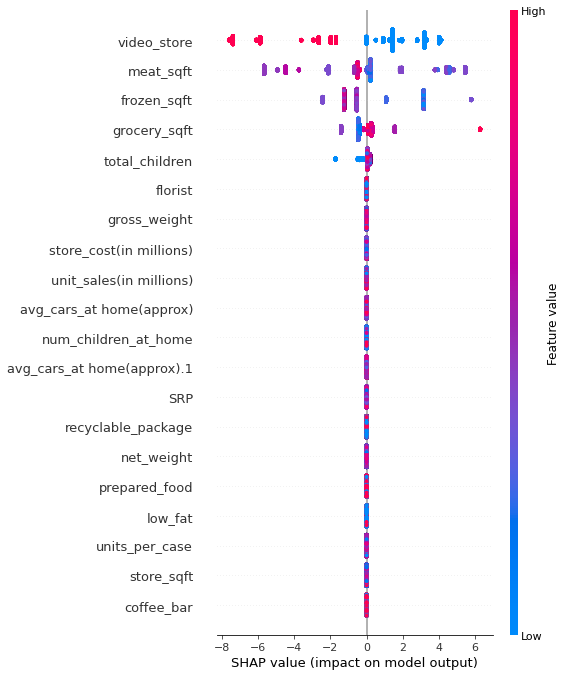

In [ ]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

#3. AutoML - Shap Analysis

AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_6_AutoML_2_20230325_195246                      29.1586  850.221  25.1307  0.311815                   850.221                6109                   0.065251  StackedEnsemble
GBM_grid_1_AutoML_2_20230325_195246_model_15                              29.1692  850.84   25.1699  0.311928                   850.84                  359                   0.008231  GBM
StackedEnsemble_BestOfFamily_7_AutoML_2_20230325_195246                   29.1775  851.328  25.1455  0.311861                   851.328                1937                   0.064197  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1724                   0.03584   StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1594                   0.037192  StackedEnsemble
StackedEnsemble_Best1000_1_AutoML_2_20230325_195246                       29.1795  851.445  25.1612  0.312117                   851.445                2250                   0.043278  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                1356                   0.051762  StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                 781                   0.055157  StackedEnsemble
GBM_grid_1_AutoML_2_20230325_195246_model_3                               29.1921  852.182  25.1752  0.312274                   852.182                 460                   0.007748  GBM
XGBoost_lr_search_selection_AutoML_2_20230325_195246_select_grid_model_4  29.1986  852.557  25.1525  0.312162                   852.557                1486                   0.006814  XGBoost
XGBoost_grid_1_AutoML_2_20230325_195246_model_40                          29.2007  852.683  25.1522  0.312118                   852.683                 345                   0.001331  XGBoost
GBM_grid_1_AutoML_2_20230325_195246_model_18                              29.2031  852.818  25.1883  0.312418                   852.818                 296                   0.009181  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_1                               29.206   852.99   25.1702  0.312468                   852.99                  287                   0.005134  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_17                              29.2075  853.079  25.179   0.312257                   853.079                 571                   0.006149  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_13                              29.2177  853.674  25.1806  0.312405                   853.674                 345                   0.009399  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_6                               29.2279  854.268  25.2247  0.312613                   854.268                 424                   0.005484  GBM
StackedEnsemble_AllModels_2_AutoML_2_20230325_195246                      29.2286  854.309  25.2252  0.312511                   854.309                 453                   0.036131  StackedEnsemble
GBM_grid_1_AutoML_2_20230325_195246_model_2                               29.2357  854.724  25.218   0.312508                   854.724                 353                   0.005118  GBM
GBM_grid_1_AutoML_2_20230325_195246_model_9                               29.2358  854.735  25.2048  0.312506              

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

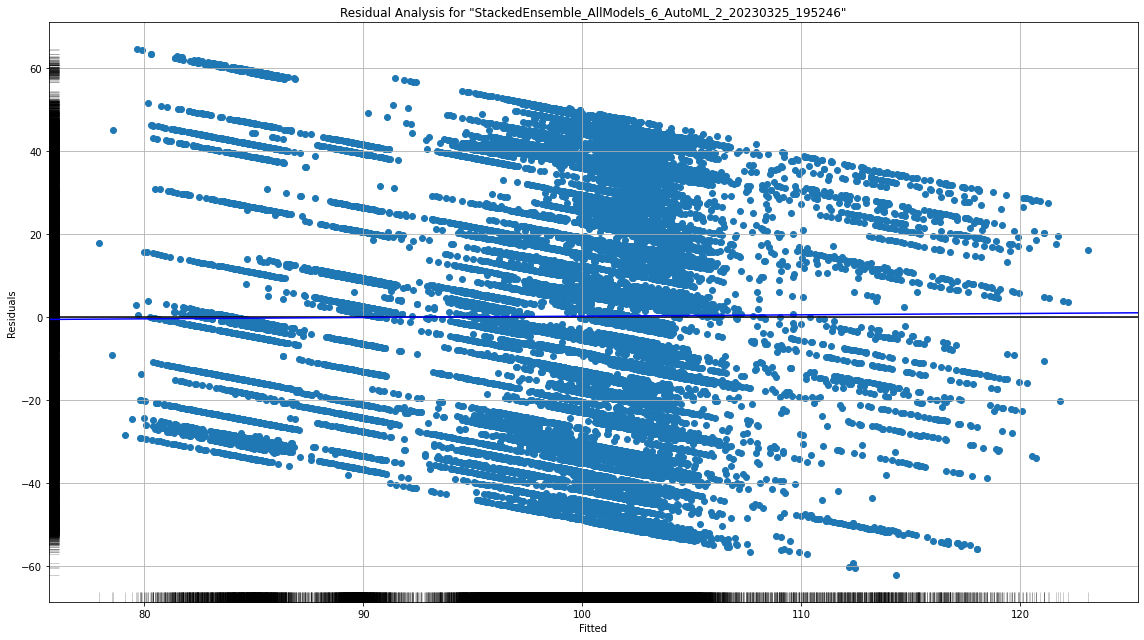

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

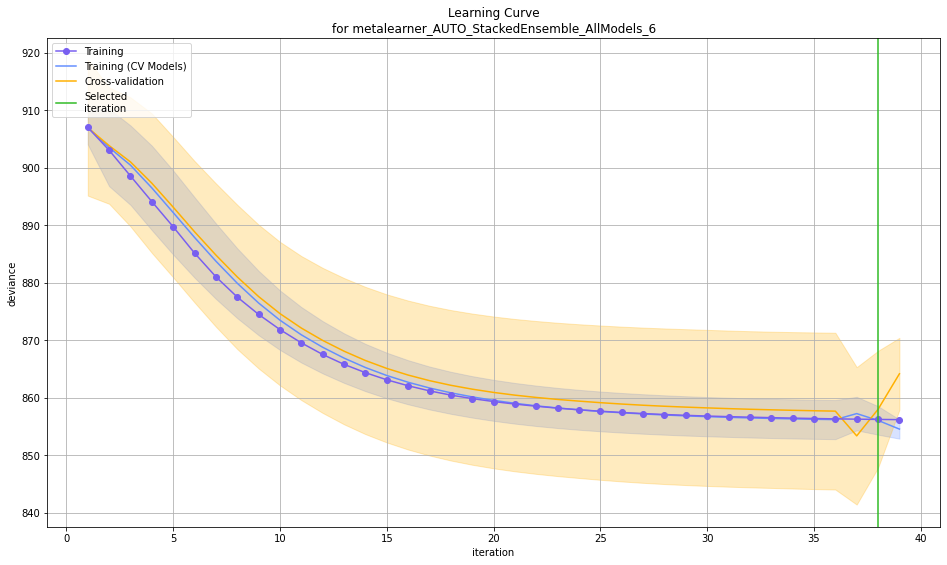

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

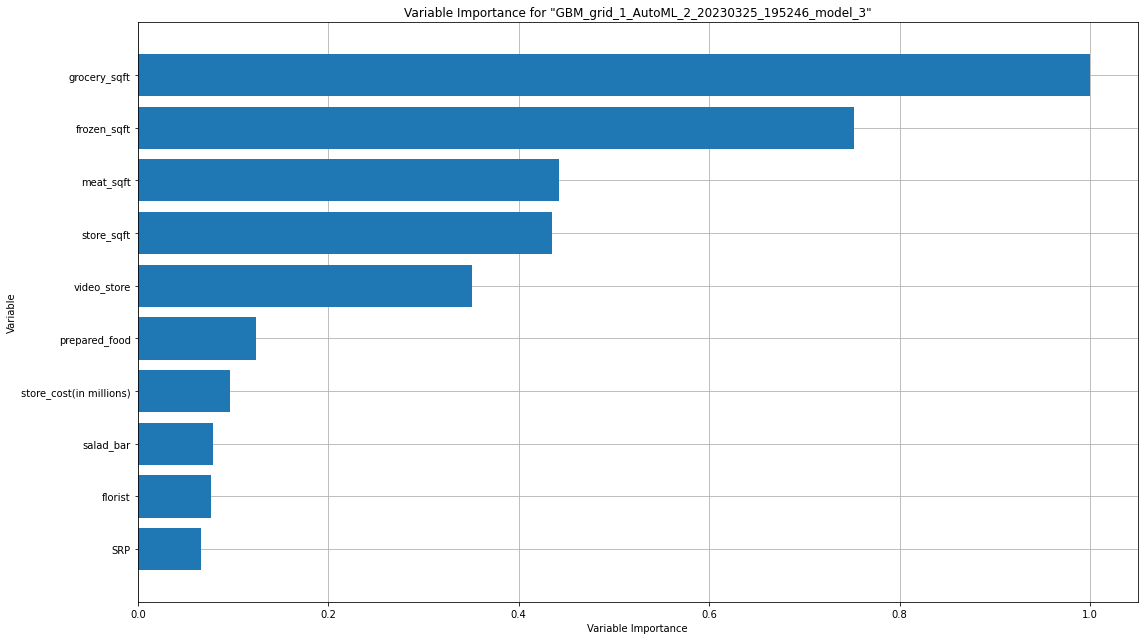

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

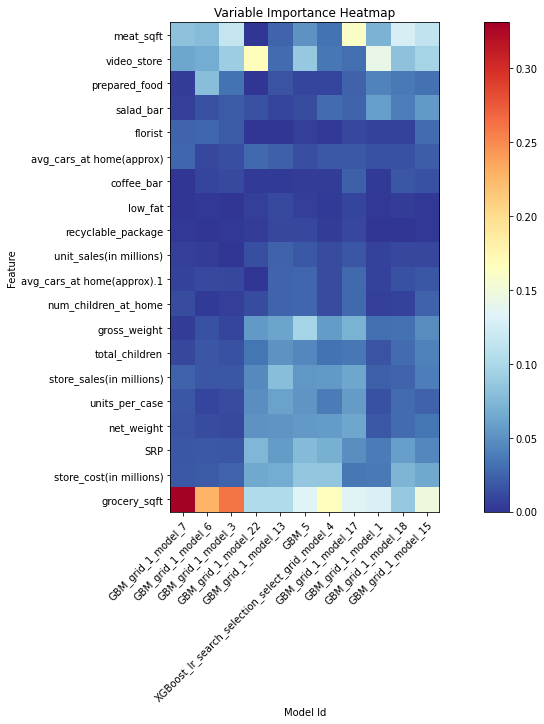

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

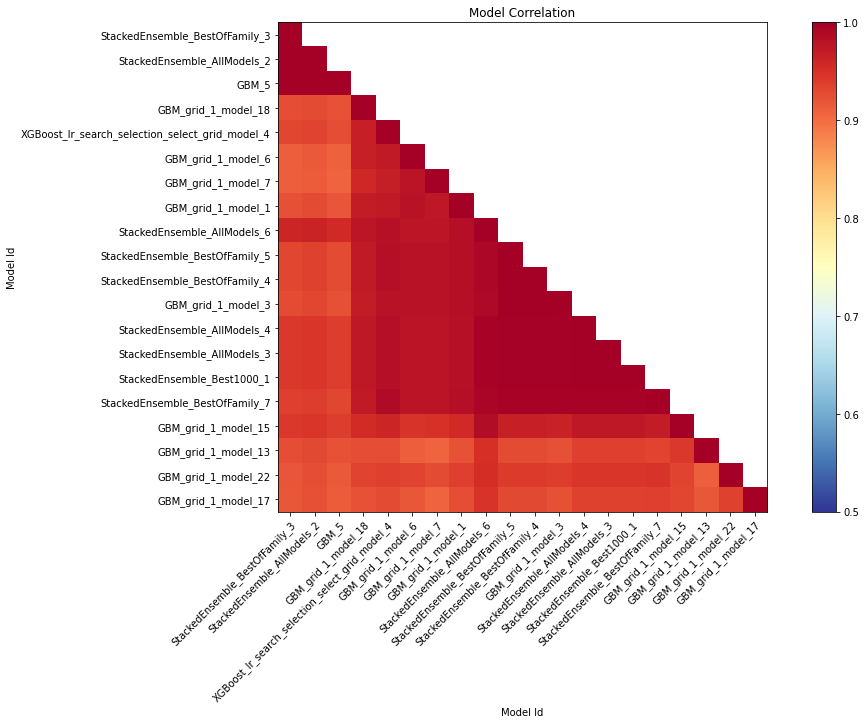

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

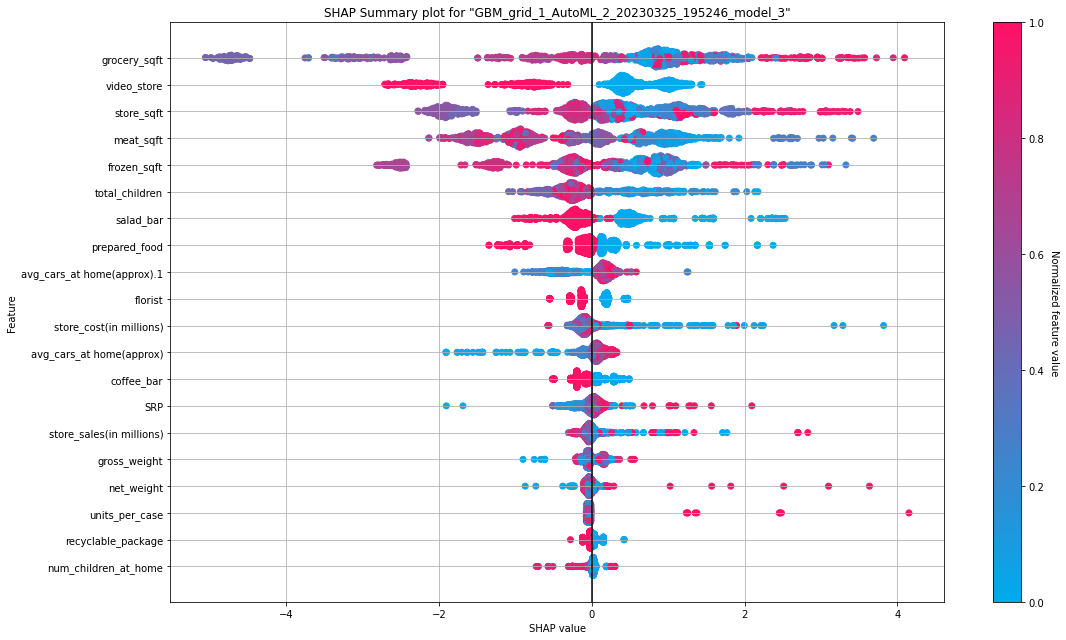

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

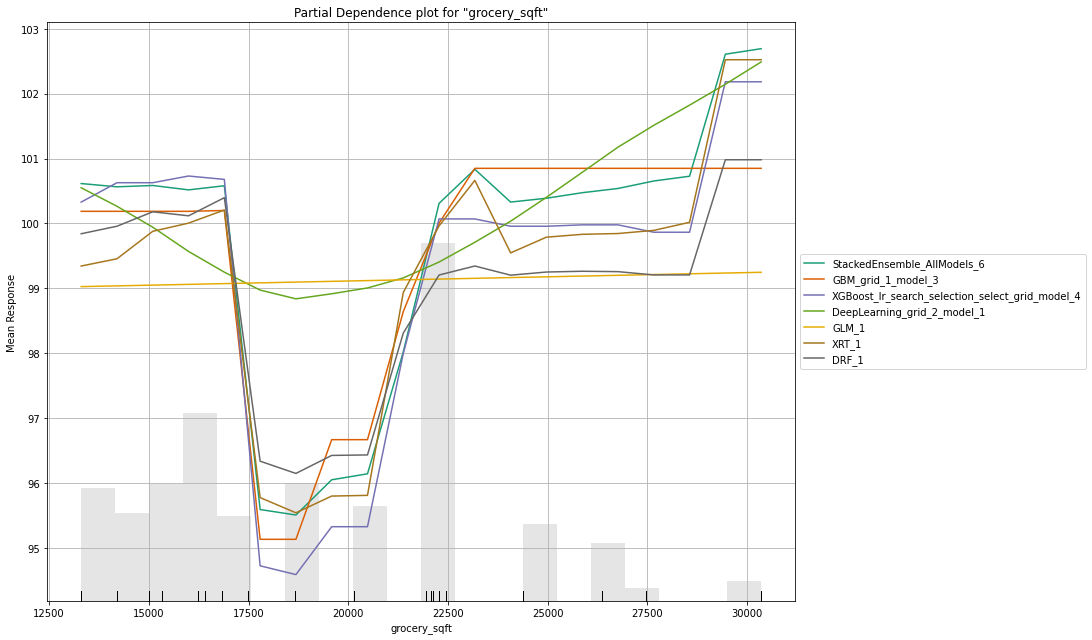

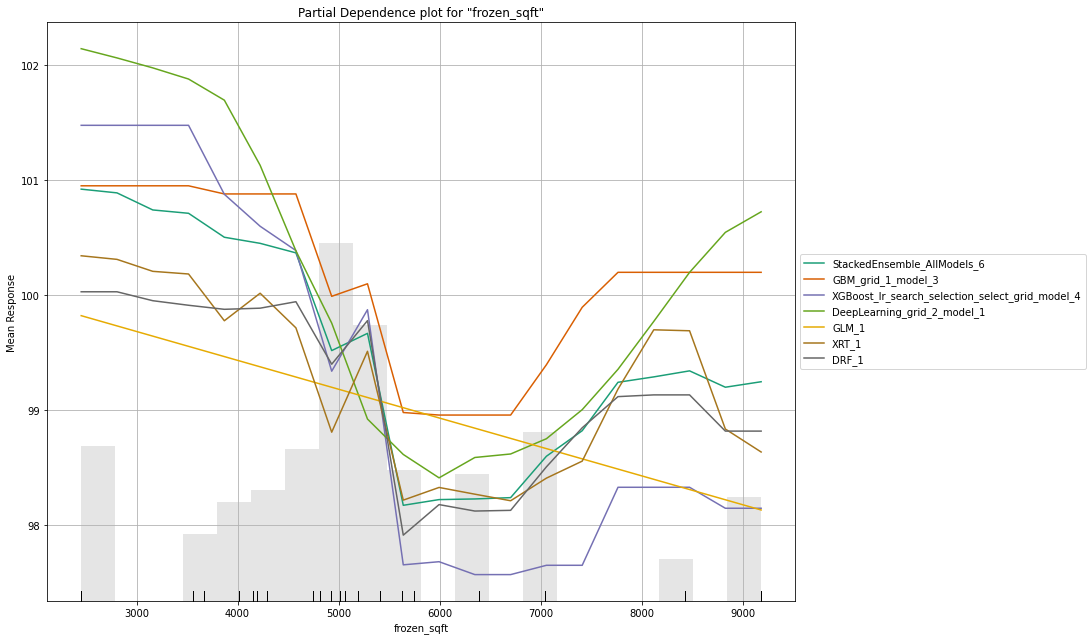

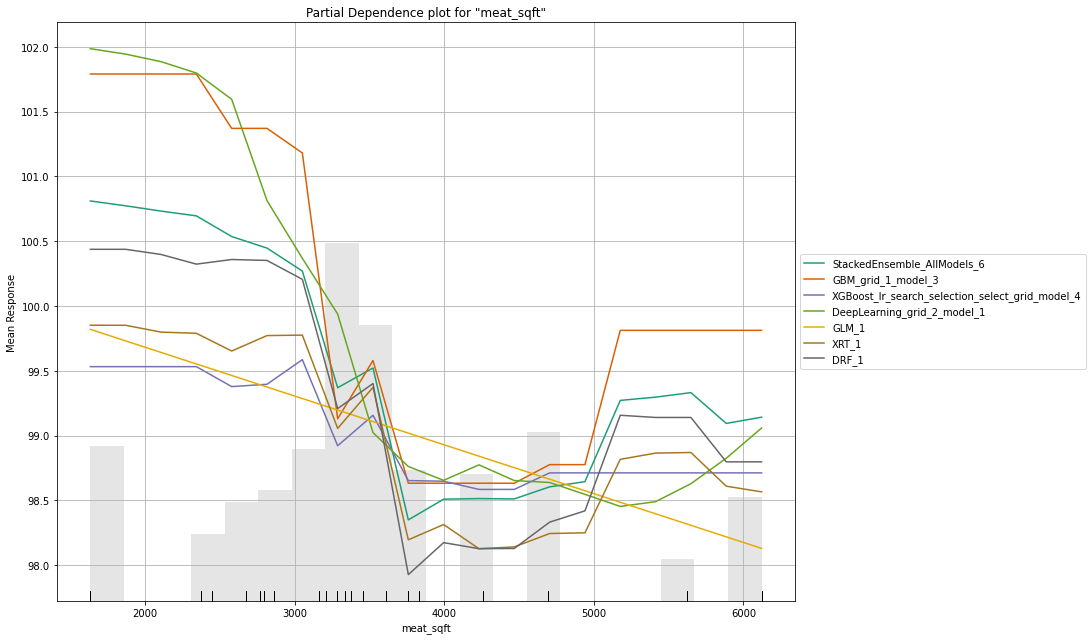

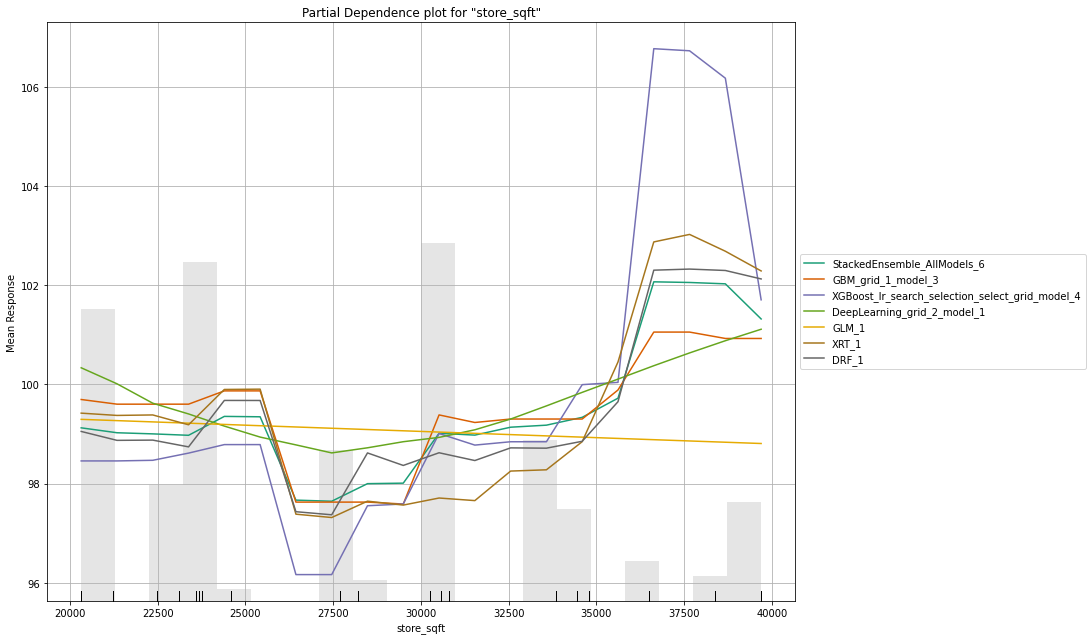

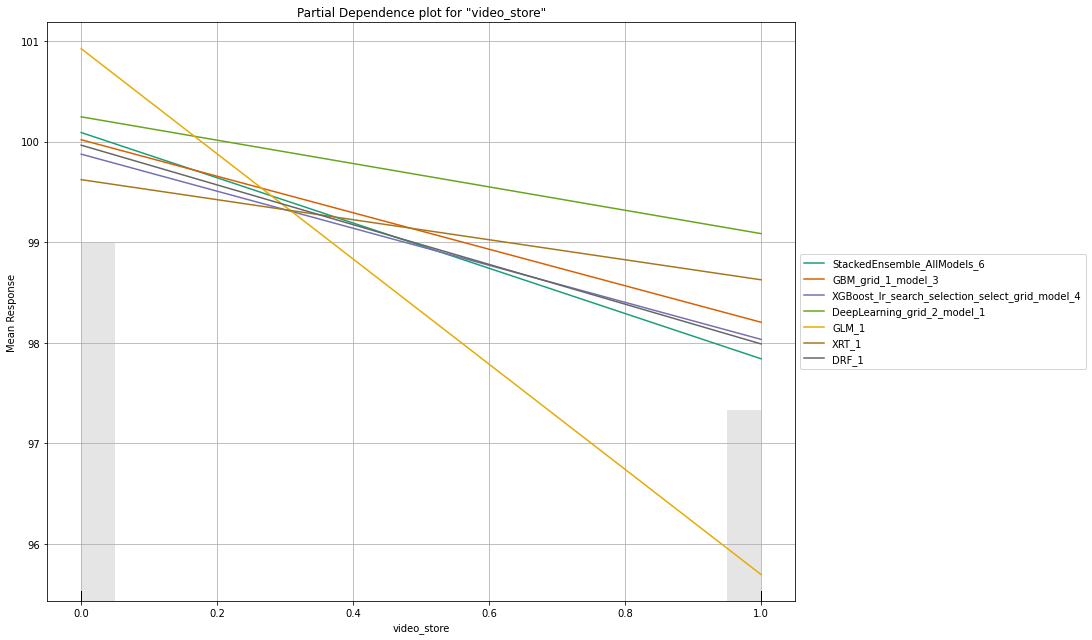

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

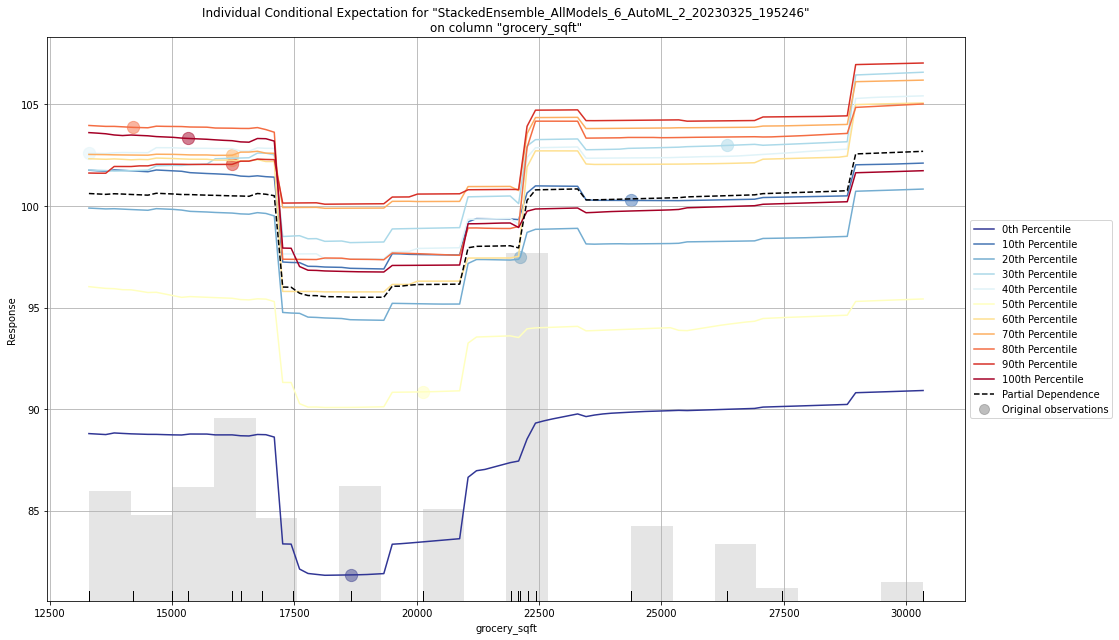

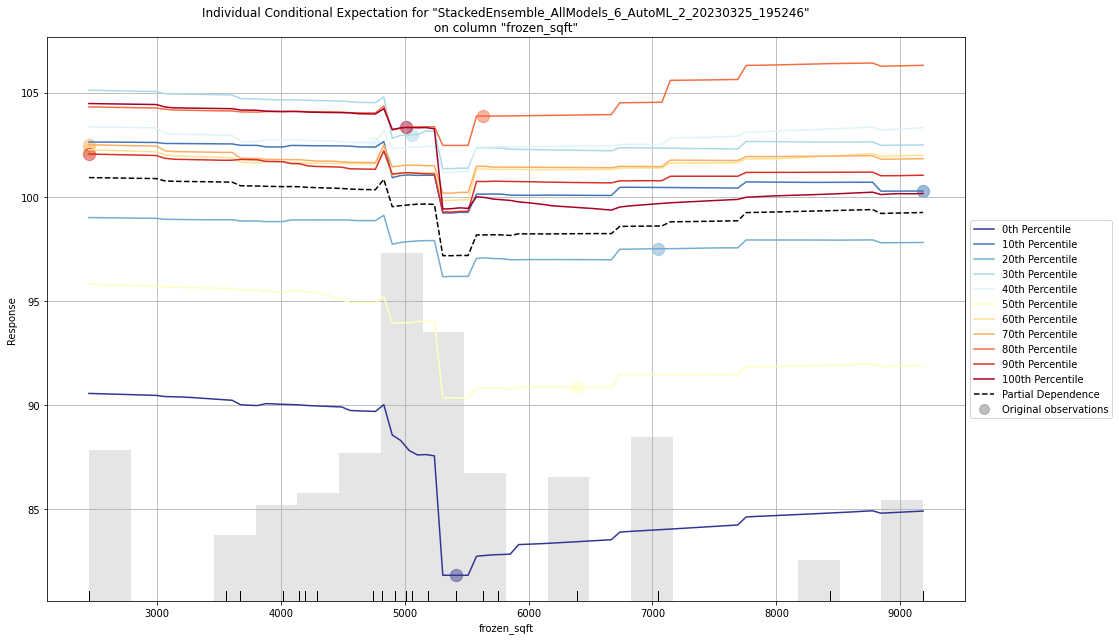

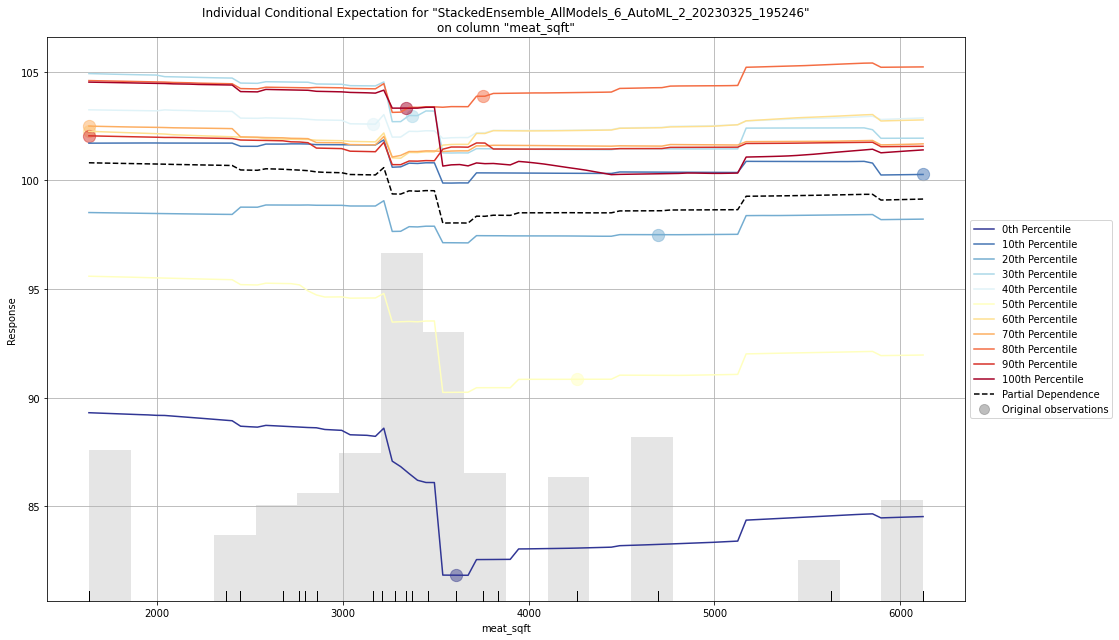

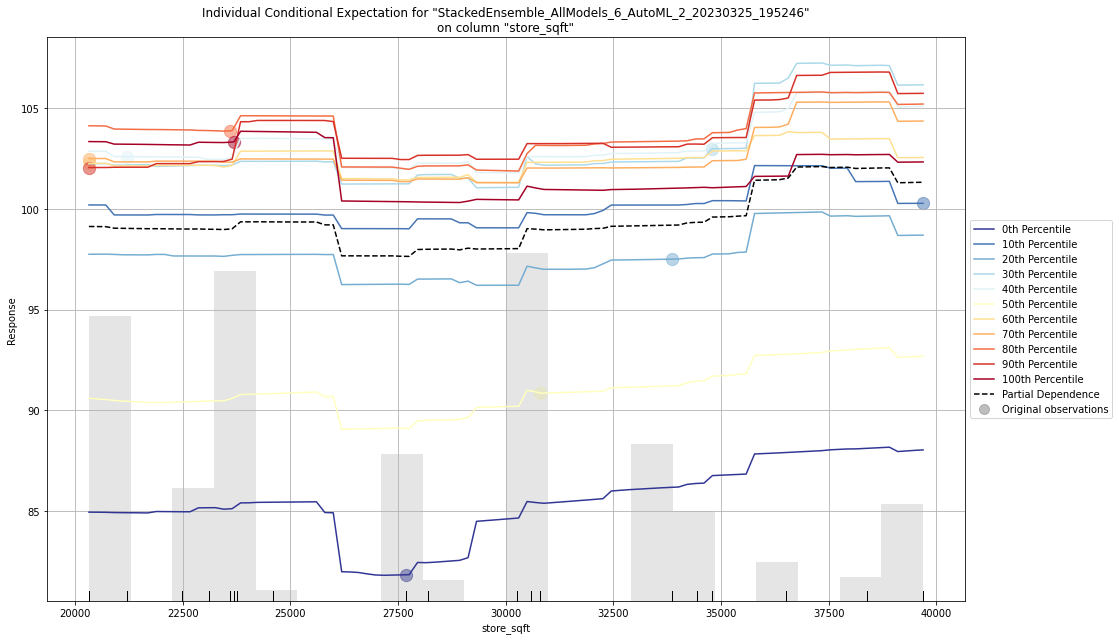

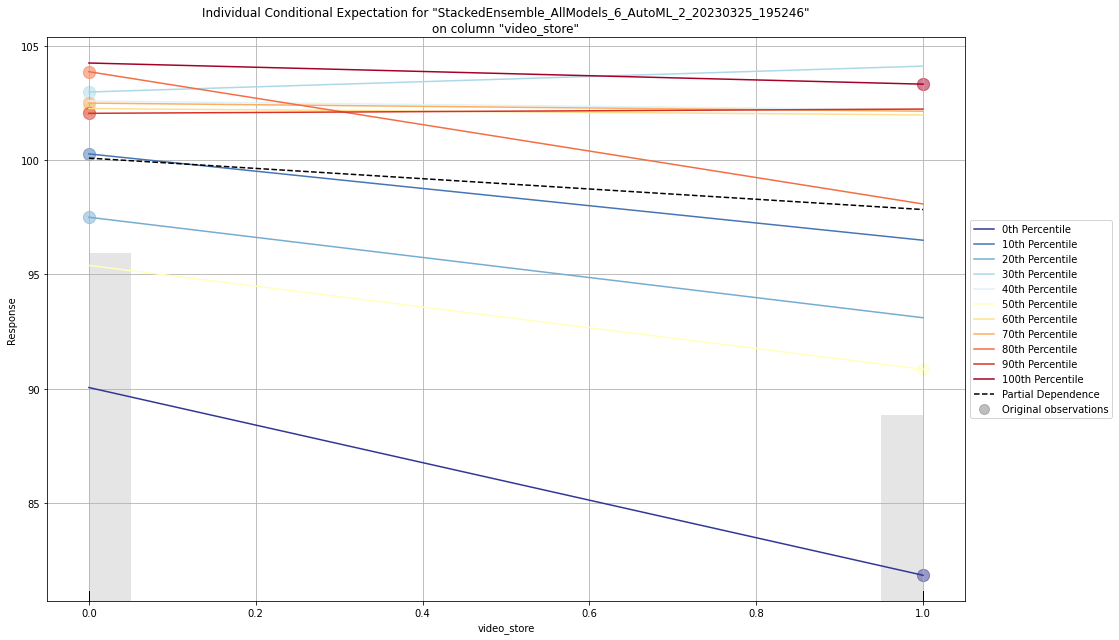

In [ ]:
exm = aml.explain(datasetAutoMLTest)


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
------------------------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
StackedEnsemble_AllModels_6_AutoML_2_20230325_195246                      29.1586  850.221  25.1307  0.311815                   850.221                6109                   0.065251  StackedEnsemble   100.36
GBM_grid_1_AutoML_2_20230325_195246_model_15                              29.1692  850.84   25.1699  0.311928                   850.84                  359                   0.008231  GBM                99.4081
StackedEnsemble_BestOfFamily_7_AutoML_2_20230325_195246                   29.1775  851.328  25.1455  0.311861                   851.328                1937                   0.064197  StackedEnsemble    99.723
StackedEnsemble_AllModels_4_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1724                   0.03584   StackedEnsemble    99.6161
StackedEnsemble_AllModels_3_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1594                   0.037192  StackedEnsemble    99.6161
StackedEnsemble_Best1000_1_AutoML_2_20230325_195246                       29.1795  851.445  25.1612  0.312117                   851.445                2250                   0.043278  StackedEnsemble    99.6136
StackedEnsemble_BestOfFamily_4_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                1356                   0.051762  StackedEnsemble    99.4352
StackedEnsemble_BestOfFamily_5_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                 781                   0.055157  StackedEnsemble    99.435
GBM_grid_1_AutoML_2_20230325_195246_model_3                               29.1921  852.182  25.1752  0.312274                   852.182                 460                   0.007748  GBM                99.2704
XGBoost_lr_search_selection_AutoML_2_20230325_195246_select_grid_model_4  29.1986  852.557  25.1525  0.312162                   852.557                1486                   0.006814  XGBoost           100.111
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

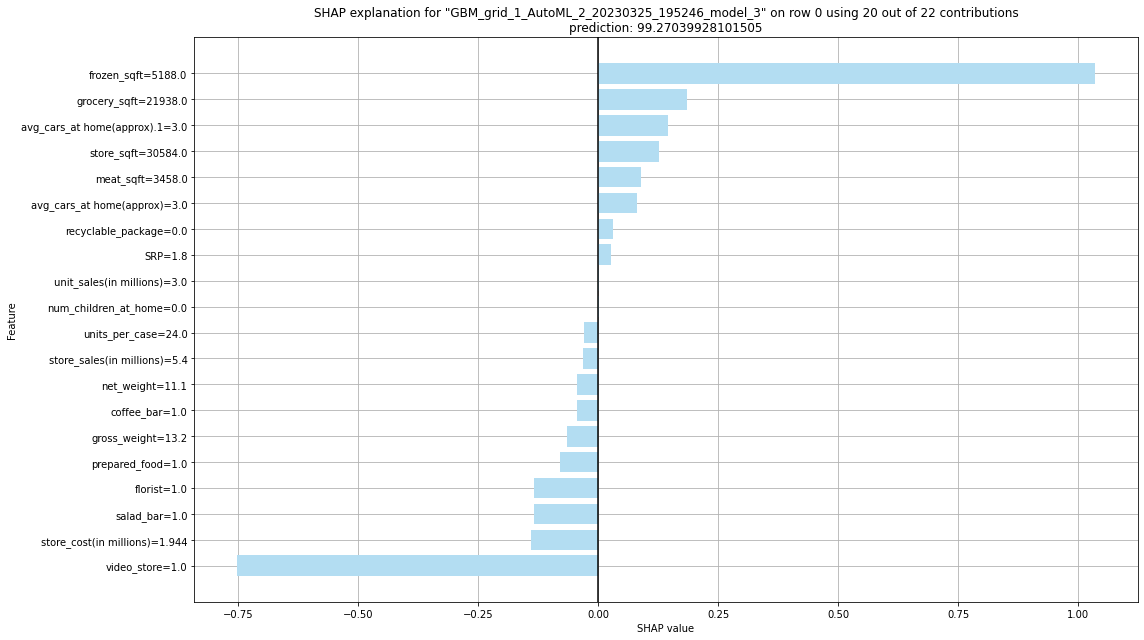

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
------------------------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
StackedEnsemble_AllModels_6_AutoML_2_20230325_195246                      29.1586  850.221  25.1307  0.311815                   850.221                6109                   0.065251  StackedEnsemble   100.36
GBM_grid_1_AutoML_2_20230325_195246_model_15                              29.1692  850.84   25.1699  0.311928                   850.84                  359                   0.008231  GBM                99.4081
StackedEnsemble_BestOfFamily_7_AutoML_2_20230325_195246                   29.1775  851.328  25.1455  0.311861                   851.328                1937                   0.064197  StackedEnsemble    99.723
StackedEnsemble_AllModels_4_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1724                   0.03584   StackedEnsemble    99.6161
StackedEnsemble_AllModels_3_AutoML_2_20230325_195246                      29.1793  851.433  25.1606  0.312113                   851.433                1594                   0.037192  StackedEnsemble    99.6161
StackedEnsemble_Best1000_1_AutoML_2_20230325_195246                       29.1795  851.445  25.1612  0.312117                   851.445                2250                   0.043278  StackedEnsemble    99.6136
StackedEnsemble_BestOfFamily_4_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                1356                   0.051762  StackedEnsemble    99.4352
StackedEnsemble_BestOfFamily_5_AutoML_2_20230325_195246                   29.1886  851.976  25.168   0.312227                   851.976                 781                   0.055157  StackedEnsemble    99.435
GBM_grid_1_AutoML_2_20230325_195246_model_3                               29.1921  852.182  25.1752  0.312274                   852.182                 460                   0.007748  GBM                99.2704
XGBoost_lr_search_selection_AutoML_2_20230325_195246_select_grid_model_4  29.1986  852.557  25.1525  0.312162                   852.557                1486                   0.006814  XGBoost           100.111
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(datasetAutoMLTest, row_index=0)


#LIME (Local Interpretation Model-Agnostic Explanation) Analysis

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box.

• LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood.

Please refer below for Visualizations of both models

• As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. 

The Color orange here represents positive and Blue represents negative
• In Orange category are grocery sqft, gross_weight, prepared_food, coffee_bar, avg_cars_at_home etc

• Where as in the Blue category are Store_sqft, frozen_sqft, recyclable_package, , salad_bar etcf had a negative effect in the linear model but positive in tree-based model

These interpretations were carried out locally in the region where of out sample data(sample_index = 18).
Linear Model

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns, mode="regression")

In [ ]:
from sklearn.linear_model import LinearRegression

# create an instance of the linear model
linear_model = LinearRegression()

# train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction :", linear_model.predict(np_x_test[0].reshape(1,-1)))
print ( "Actual: ", np_y_test[idx])
lime_linear_explanation = lime_linear_explainer.explain_instance(np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1])
lime_linear_explanation

Prediction : [99.01684696]
Actual:  64.76


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
lime_linear_explanation.show_in_notebook()

#References

Kaggle : https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

#LICENSE
MIT License

Copyright (c) 2022 Sriram Voruganti

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.